# Hand Written Digit Classifier With TensorFlow

Learning how to build neural networks in TensorFlow.

In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb

In [2]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

The datasets consists of 25x25 matrices where each element is a value between 0 and 255 which represents the grayscale value of the pixel (0 being black and 255 being white), and labels between 0 and 9.

labels  [5 0 4]


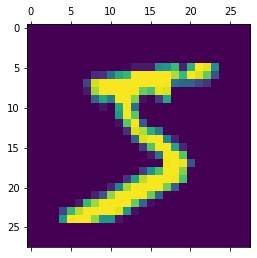

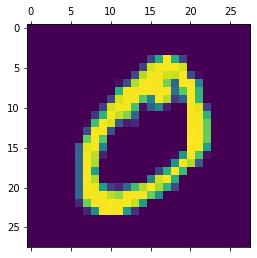

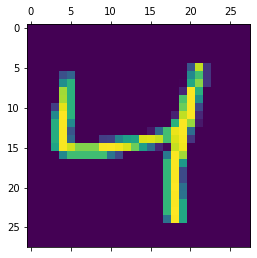

In [3]:
plt.matshow(X_train[0])
print("labels ", y_train[:3])
plt.matshow(X_train[1])
plt.matshow(X_train[2])

In [4]:
# scaling data
X_train = X_train/255
X_test = X_test/255

## Feedforward Neural Network

Idea is to have 2 layers. Input layer with 784 input nodes and an output layer with 10 output nodes.

In [5]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [8]:
# Create Neural Network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Train the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 591us/step - loss: 0.4652 - accuracy: 0.8798
Epoch 2/5
1875/1875 [==============================] - 1s 554us/step - loss: 0.3036 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 1s 561us/step - loss: 0.2838 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 550us/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 564us/step - loss: 0.2666 - accuracy: 0.9259


In [9]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 451us/step - loss: 0.2708 - accuracy: 0.9237


[0.2707985043525696, 0.9236999750137329]

Using the model for predictions:

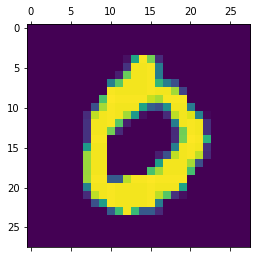

In [18]:
plt.matshow(X_test[3])

In [16]:
y_predicted = model.predict(X_test_flattened)
print(y_predicted[3])

[9.9948144e-01 2.5603777e-08 1.3175011e-01 1.1112750e-02 5.9510618e-05
 5.4803550e-02 6.7089081e-02 1.6133934e-02 2.1895885e-02 3.5606593e-02]


In [15]:
np.argmax(y_predicted[3])

0

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 965    0    2    2    0    4    4    2    1    0]
 [   0 1118    3    3    0    1    3    2    5    0]
 [   6    9  926   20    7    1   11   10   38    4]
 [   2    0   21  940    0    8    1   10   19    9]
 [   2    1    8    2  908    0    7    4    7   43]
 [  10    3    7   53   11  744   10    8   38    8]
 [  16    3    8    2    8   11  905    2    3    0]
 [   1    7   23    8    8    0    0  943    0   38]
 [   7   10    7   34    9   18    9   12  859    9]
 [  11    7    1   13   24    4    0   15    5  929]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

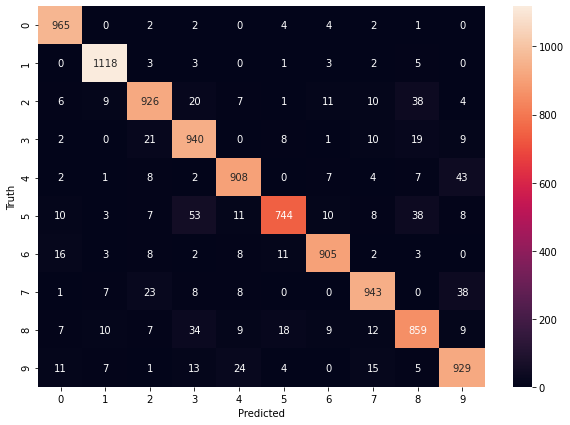

In [26]:
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

### With Hidden Layer

In [34]:
# Create Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 828us/step - loss: 0.2723 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 2s 814us/step - loss: 0.1202 - accuracy: 0.9644TA: 0s - loss: 0.125
Epoch 3/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.0844 - accuracy: 0.97430s - loss: 0.0848 - accu
Epoch 4/5
1875/1875 [==============================] - 2s 932us/step - loss: 0.0637 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 2s 805us/step - loss: 0.0499 - accuracy: 0.9843


In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 625us/step - loss: 0.0750 - accuracy: 0.9762


[0.07496163994073868, 0.9761999845504761]

Text(69.0, 0.5, 'Truth')

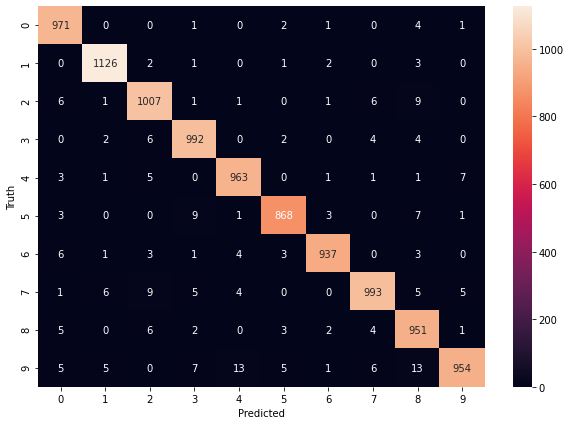

In [36]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

A lot less errors.

## Convolutional Neural Network